# Exercise 1

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

## Exercise 1.1

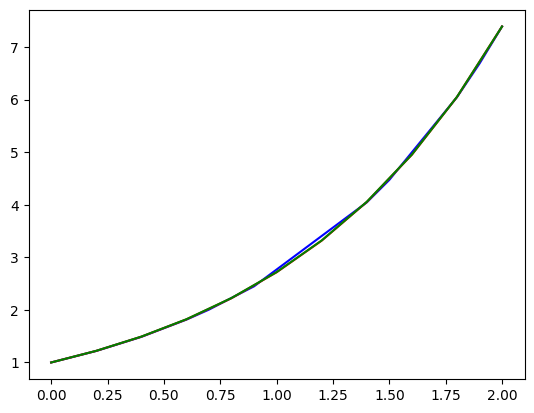

In [2]:
def BVP1D(c, d, xs=None, M=None, L=None):
    if xs is None:
        assert L is not None and M is not None
        xs = np.linspace(0, L, M)
    
    if M is None:
        assert xs is not None
        M = len(xs)

    # Algorithm 1
    Ass = np.zeros((M,M))
    bs = np.zeros(M)

    for i in range(M-1):
        h = xs[i+1] - xs[i]
        k1 = 1/h + h/3
        k2 = -1/h + h/6

        Ass[i, i] += k1
        Ass[i, i+1] = k2
        Ass[i+1, i] = k2
        Ass[i+1, i+1] = k1

    # Algorithm 2
    bs[0] = c
    bs[1] -= Ass[0,1] * c
    bs[M-2] -= Ass[M-2,M-1] * d
    bs[M-1] = d
    
    Ass[0,0] = 1
    Ass[0,1] = 0
    Ass[1,0] = 0
    Ass[M-1, M-1] = 1
    Ass[M-2, M-1] = 0
    Ass[M-1, M-2] = 0

    us = np.linalg.solve(Ass, bs)

    return us, xs


c = 1
d = np.exp(2)
xs = [0.0, 0.2, 0.4, 0.6, 0.7, 0.9, 1.4, 1.5, 1.8, 1.9, 2.0]
us, xs = BVP1D(c, d, xs=xs)
plt.plot(xs, us, color='blue')

M = 11
L = 2
us, xs = BVP1D(c, d, M=M, L=L)
plt.plot(xs, us, color='red')

plt.plot(xs, np.exp(xs), color='green')
plt.show()

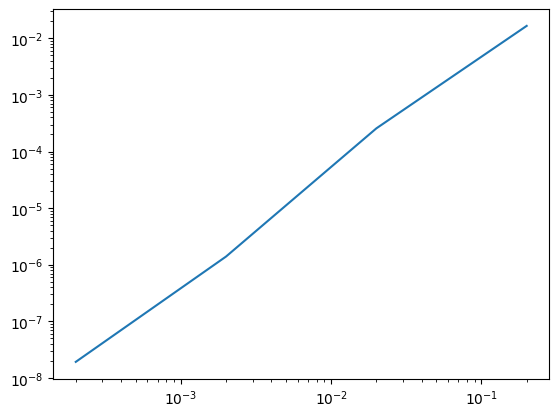

array([ 2.00660638, -0.74334579])

In [8]:
def uhat(x, xs, us):
    i = np.searchsorted(xs, x) - 1
    h = xs[i+1] - xs[i]
    
    N1 = 1 - (x - xs[i]) / h
    N2 = (x - xs[i]) / h

    return us[i] * N1 + us[i+1] * N2

c = 1
d = np.exp(2)
L = 2

hs = []
max_errors = []



for M in [10, 100, 1000, 10000]:
    us, xs = BVP1D(c, d, M=M, L=L)

    hs.append(L / M)
    max_errors.append(-sp.optimize.fminbound(lambda x: -np.abs(uhat(x, xs, us) - np.exp(x)), 0, L, full_output=True)[1])

plt.loglog(hs, max_errors)
plt.show()

np.polyfit(np.log(hs), np.log(max_errors), 1)[0]